In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import os

In [2]:
filepath = r"E:\college\cats_dogs\train\fold1\cat_1.wav"
ipd.Audio(filepath)

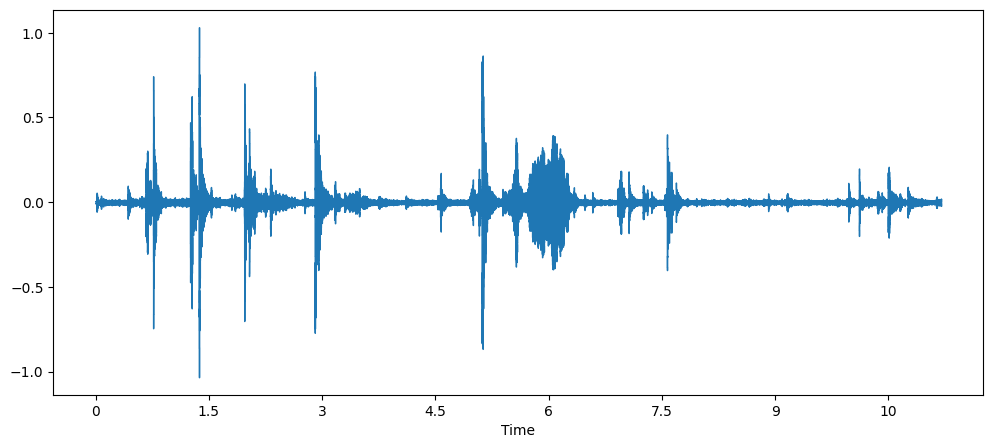

In [3]:
import librosa
import librosa.display
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

16000
[ 124  107    7 ... -545 -494 -529]


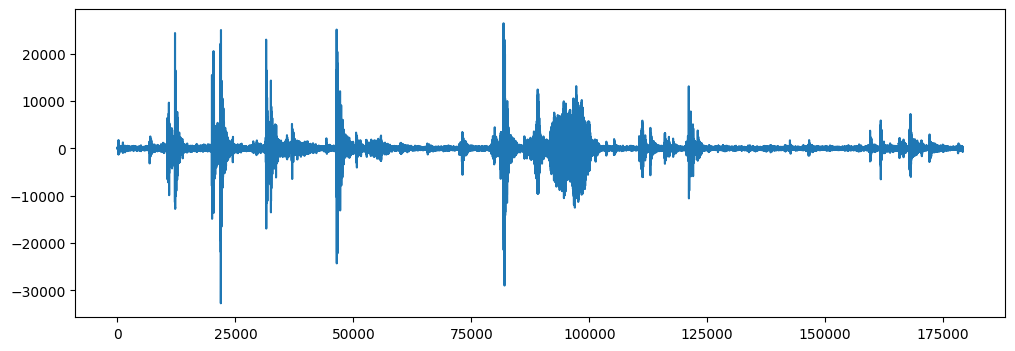

In [4]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [5]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 483)
[[-3.15165619e+02 -2.85670044e+02 -3.29105835e+02 ... -3.82343475e+02
  -3.83735229e+02 -3.88043182e+02]
 [ 7.51905212e+01  8.75689087e+01  1.08141815e+02 ...  1.34781967e+02
   1.27964828e+02  1.21465729e+02]
 [-7.12992783e+01 -7.22336731e+01 -3.95862122e+01 ...  1.22693110e+01
   3.19641447e+00  3.30933332e-02]
 ...
 [ 1.68787634e+00  1.96138453e+00 -1.06267500e+00 ... -1.76694250e+00
   2.56575656e+00  4.69114923e+00]
 [ 2.91728354e+00  3.61033916e+00  1.31771350e+00 ... -1.03288841e+00
   3.81060183e-01  1.65800047e+00]
 [-2.26824462e-01 -1.20760366e-01 -1.13061965e-01 ... -1.69561553e+00
  -1.07316446e+00  6.51232958e-01]]


In [6]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    scaled_features = np.mean(features.T,axis=0)
    return scaled_features

In [7]:
import pandas as pd
metadata = pd.read_csv(r"E:\college\train_test_split.csv")

In [8]:
audio_dataset_path = "E:\college\cats_dogs\train"

In [9]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath("train"),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

276it [00:34,  8.05it/s]


In [10]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature class
0  [-236.98203, 146.6807, -99.332794, -0.46603483...   CAT
1  [-152.68735, 84.39058, -136.0772, 23.25614, -7...   CAT
2  [-316.24026, 126.02876, -4.8260365, -13.921375...   CAT
3  [-287.7423, 92.177895, -30.619703, 6.940169, -...   CAT
4  [-273.81534, 72.47177, -52.112762, 80.82701, -...   CAT

In [11]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
num_labels=y.shape[1]

In [25]:
num_labels

2

In [13]:
model=Sequential()
model.add(Dense(1000,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [15]:
model.fit(X_train, y_train, batch_size=15, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
15/15 [==============================] - 2s 38ms/step - loss: 12.1213 - accuracy: 0.5227 - val_loss: 0.8287 - val_accuracy: 0.8036
Epoch 2/100
15/15 [==============================] - 0s 11ms/step - loss: 8.5902 - accuracy: 0.6091 - val_loss: 0.3510 - val_accuracy: 0.9286
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 4.7828 - accuracy: 0.6682 - val_loss: 0.2306 - val_accuracy: 0.9286
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 3.1174 - accuracy: 0.7591 - val_loss: 0.5479 - val_accuracy: 0.8929
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 2.8360 - accuracy: 0.7273 - val_loss: 0.2283 - val_accuracy: 0.9107
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 3.0557 - accuracy: 0.6864 - val_loss: 0.5700 - val_accuracy: 0.7857
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 2.1882 - accuracy: 0.7409 - val_loss: 0.4211 - val_accuracy: 0.8393
Epoch

15/15 [==============================] - 0s 14ms/step - loss: 0.4242 - accuracy: 0.8273 - val_loss: 0.2165 - val_accuracy: 0.9643
Epoch 59/100
15/15 [==============================] - 0s 15ms/step - loss: 0.3000 - accuracy: 0.8773 - val_loss: 0.2230 - val_accuracy: 0.9643
Epoch 60/100
15/15 [==============================] - 0s 11ms/step - loss: 0.3604 - accuracy: 0.8636 - val_loss: 0.2777 - val_accuracy: 0.9643
Epoch 61/100
15/15 [==============================] - 0s 12ms/step - loss: 0.3732 - accuracy: 0.8591 - val_loss: 0.2901 - val_accuracy: 0.9643
Epoch 62/100
15/15 [==============================] - 0s 14ms/step - loss: 0.3290 - accuracy: 0.8500 - val_loss: 0.2352 - val_accuracy: 0.9464
Epoch 63/100
15/15 [==============================] - 0s 10ms/step - loss: 0.3768 - accuracy: 0.8591 - val_loss: 0.2193 - val_accuracy: 0.9643
Epoch 64/100
15/15 [==============================] - 0s 13ms/step - loss: 0.3387 - accuracy: 0.8500 - val_loss: 0.2204 - val_accuracy: 0.9643
Epoch 65/100

In [16]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9642857313156128


In [24]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

2/2 [==============================] - 0s 5ms/step
[0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1]
